# Modules BEGINNER

Esta tabla contiene la información a nivel de fichero (módulo).

## 1 - Obtencion de datos

In [1]:
import matplotlib.pyplot as plt
from notebooks_utils import *
from domains import *

TARGET_FEATURE = 'module__expertise_level'
TARGET_CLASS = 'BEGINNER'
full_table = get_data('modules')

instances_for_class_low = len(full_table[full_table[TARGET_FEATURE] == "BEGINNER"])
instances_for_class_high = len(full_table[full_table[TARGET_FEATURE] == "EXPERT"])

print(f"The dataset contains {instances_for_class_low} ({instances_for_class_low/len(full_table)*100:.4}%) instances for BEGINNER class and {instances_for_class_high} ({instances_for_class_high/len(full_table)*100:.4}%) for EXPERT class.")

2024-07-04 16:06:02.956662 Data cache files found ...
2024-07-04 16:06:02.960169 Data cache files successfully loaded!!
The dataset contains 7124 (39.09%) instances for BEGINNER class and 11102 (60.91%) for EXPERT class.


In [2]:
full_table = full_table[full_table[TARGET_FEATURE] == TARGET_CLASS]

# Table name, features and target.
TABLE_NAME = 'modules'
TABLE_FEATURES = ['module__name_convention', 'module__has_doc_string', 'module__global_stmts_pct', 'module__global_expressions_pct', 'module__number_of_classes', 'module__number_of_functions', 'module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct', 'module__average_stmts_function_body', 'module__average_stmts_method_body', 'module__type_annotations_pct', 'module__has_entry_point']

# Load features and target.
X = full_table[TABLE_FEATURES]

# Print information about the loaded table.
print(f' {TARGET_CLASS} CLASS Features shape: {X.shape}')

print(f'As we can see the downloaded data contains a total of {X.shape[0]} instances of {TARGET_CLASS}. Each of the instances corresponds to a file. For each file we have {X.shape[1]} attributes.')

 BEGINNER CLASS Features shape: (7124, 13)
As we can see the downloaded data contains a total of 7124 instances of BEGINNER. Each of the instances corresponds to a file. For each file we have 13 attributes.


## 2 - Exploracion de datos

Una vez tenemos nuestra tabla en un dataframe el siguiente paso es explorarla para ver qué tipo de información contiene.

In [3]:
print(X.info())

<class 'pandas.core.frame.DataFrame'>
Index: 7124 entries, 0 to 7283
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   module__name_convention              7124 non-null   object 
 1   module__has_doc_string               7124 non-null   bool   
 2   module__global_stmts_pct             7124 non-null   float64
 3   module__global_expressions_pct       7124 non-null   float64
 4   module__number_of_classes            7124 non-null   int64  
 5   module__number_of_functions          7124 non-null   int64  
 6   module__class_defs_pct               7124 non-null   float64
 7   module__function_defs_pct            7124 non-null   float64
 8   module__enum_defs_pct                7124 non-null   float64
 9   module__average_stmts_function_body  7124 non-null   float64
 10  module__average_stmts_method_body    7124 non-null   float64
 11  module__type_annotations_pct       

Cómo podemos ver la tabla está compuesta por diez variables numéricas, dos variables boleanas y una de tipo objeto. Las dos últimas variables son la etiqueta de la instancia y el name convention.

### 2.1 - Valores Nulos 
Miramos si alguna de las variables que contiene la tabla contiene algún valor que sea nulo.

In [4]:
X.isnull().sum()

module__name_convention                0
module__has_doc_string                 0
module__global_stmts_pct               0
module__global_expressions_pct         0
module__number_of_classes              0
module__number_of_functions            0
module__class_defs_pct                 0
module__function_defs_pct              0
module__enum_defs_pct                  0
module__average_stmts_function_body    0
module__average_stmts_method_body      0
module__type_annotations_pct           0
module__has_entry_point                0
dtype: int64

In [5]:
print_empty_cols(X)

module__name_convention
-----------------------
0 instancias no tienen un valor para la columna module__name_convention


module__has_doc_string
----------------------
0 instancias no tienen un valor para la columna module__has_doc_string


module__global_stmts_pct
------------------------
0 instancias no tienen un valor para la columna module__global_stmts_pct


module__global_expressions_pct
------------------------------
0 instancias no tienen un valor para la columna module__global_expressions_pct


module__number_of_classes
-------------------------
0 instancias no tienen un valor para la columna module__number_of_classes


module__number_of_functions
---------------------------
0 instancias no tienen un valor para la columna module__number_of_functions


module__class_defs_pct
----------------------
0 instancias no tienen un valor para la columna module__class_defs_pct


module__function_defs_pct
-------------------------
0 instancias no tienen un valor para la columna module__fu

### 2.2 - Describimos los valores de las variables de la tabla.

In [6]:
np.transpose(X.describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
module__name_convention,7124,6,Lower,3126,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__has_doc_string,7124,2,False,5749,NaN,NaN,NaN,NaN,NaN,NaN,NaN
module__global_stmts_pct,7124.0,NaN,NaN,NaN,0.322743,0.321525,0.0,0.0,0.222222,0.555556,1.0
module__global_expressions_pct,7124.0,NaN,NaN,NaN,0.115504,0.173264,0.0,0.0,0.0,0.2,1.0
module__number_of_classes,7124.0,NaN,NaN,NaN,0.979506,3.819694,0.0,0.0,0.0,1.0,60.0
module__number_of_functions,7124.0,NaN,NaN,NaN,2.973049,6.652743,0.0,0.0,1.0,3.0,80.0
module__class_defs_pct,7124.0,NaN,NaN,NaN,0.201313,0.361768,0.0,0.0,0.0,0.25,1.0
module__function_defs_pct,7124.0,NaN,NaN,NaN,0.549529,0.466528,0.0,0.0,0.75,1.0,1.0
module__enum_defs_pct,7124.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0
module__average_stmts_function_body,7124.0,NaN,NaN,NaN,3.055419,3.675243,0.0,0.0,2.8,4.857143,43.0


Vamos a discretizar las variables numericas, agrupando conjuntos de valores en categorias, para hacer un análisis de los datos. Para cada variable es necesaario ver la distribucion de lo valores para hacer los bins (categorias).

In [7]:
# DISCRETIZATION
X_copy = X.copy()

discretized_columns = {
    "module__class_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__function_defs_pct": [(0.0, 0.0),(0.0, 1.0), (1.0, 1.0)],  # min: 0.0 max: 1.0
    "module__enum_defs_pct": [(0.0, 0.0), (0.0, inf)],  # min: 0.0 max: 0.0
    "module__number_of_classes": [(0, 0), (1, 1), (1,inf)],  # min: 0 max: 60
    "module__number_of_functions": [(0, 0), (0, inf)], # min: 0 max: 80
    "module__type_annotations_pct": [(0.0, 0.0), (0.0, inf)], # min: 0.0 max: 0.90
    "module__average_stmts_function_body": [(0.0, 0.0), (0.0, inf)], #min: 0.0 max: 43.0
    "module__average_stmts_method_body": [(0.0, 0.0), (0.0, inf)], # min: 0.0 max: 28.0
    "module__global_expressions_pct": [(0,0), (0.0, inf)], # min: 0.0 max: 1.0
    "module__global_stmts_pct": [(0, 0), (0.0, inf)] # min: 0.0 max: 1.0
}

discretize_columns(X_copy, discretized_columns)
    
# SINGLE FEATURE
print("--- SINGLE FEATURE ---")
print(get_statistics(X_copy, ['module__class_defs_pct'], 10))
print(get_statistics(X_copy, ['module__function_defs_pct'], 10))
print(get_statistics(X_copy, ['module__enum_defs_pct'], 10))
print(get_statistics(X_copy, ['module__number_of_classes'], 10))
print(get_statistics(X_copy, ['module__number_of_functions'], 10))
print(get_statistics(X_copy, ['module__type_annotations_pct'], 10))
print(get_statistics(X_copy, ['module__average_stmts_function_body'], 10))
print(get_statistics(X_copy, ['module__average_stmts_method_body'], 10))
print(get_statistics(X_copy, ['module__global_expressions_pct'], 10))
print(get_statistics(X_copy, ['module__global_stmts_pct'], 10))
print(get_statistics(X_copy, ['module__has_doc_string'], 10))
print(get_statistics(X_copy, ['module__has_entry_point'], 10))
print(get_statistics(X_copy, ['module__name_convention'], 10))


# 2 FEATURES
print("--- TWO FEATURES ---")
print(get_statistics(X_copy, ['module__function_defs_pct', 'module__number_of_classes'], 10))

# 3 FEATURES
print("--- THREE FEATURES ---")
print(get_statistics(X_copy, ['module__class_defs_pct', 'module__function_defs_pct', 'module__enum_defs_pct'], 10))

--- SINGLE FEATURE ---
module__class_defs_pct  count  percentage
             [0.0_0.0]   5036   70.690623
             [0.0_1.0)   1087   15.258282
             [1.0_1.0]   1001   14.051095

module__function_defs_pct  count  percentage
                [1.0_1.0]   3261   45.774846
                [0.0_0.0]   2776   38.966873
                [0.0_1.0)   1087   15.258282

module__enum_defs_pct  count  percentage
            [0.0_0.0]   7124       100.0

module__number_of_classes  count  percentage
                    [0_0]   5036   70.690623
                    [1_1]   1159   16.268950
                  [1_inf]    929   13.040427

module__number_of_functions  count  percentage
                    [0_inf]   4348   61.033127
                      [0_0]   2776   38.966873

module__type_annotations_pct  count  percentage
                   [0.0_0.0]   6239   87.577204
                   [0.0_inf]    885   12.422796

module__average_stmts_function_body  count  percentage
                     

In [8]:
def normalize_datatypes(X:pd.DataFrame) -> (pd.DataFrame, [str]):
    X = pd.get_dummies(X)
    X = X.astype('float32')        
    columns_names = X.columns.tolist()
    return X, columns_names

X, TABLE_FEATURES = normalize_datatypes(X)
# Print information about the loaded table
print(f'Features shape: {X.shape}')

Features shape: (7124, 18)


#### Muestra la matriz de correlación de Spearman entre las variables de la tabla.

<Axes: >

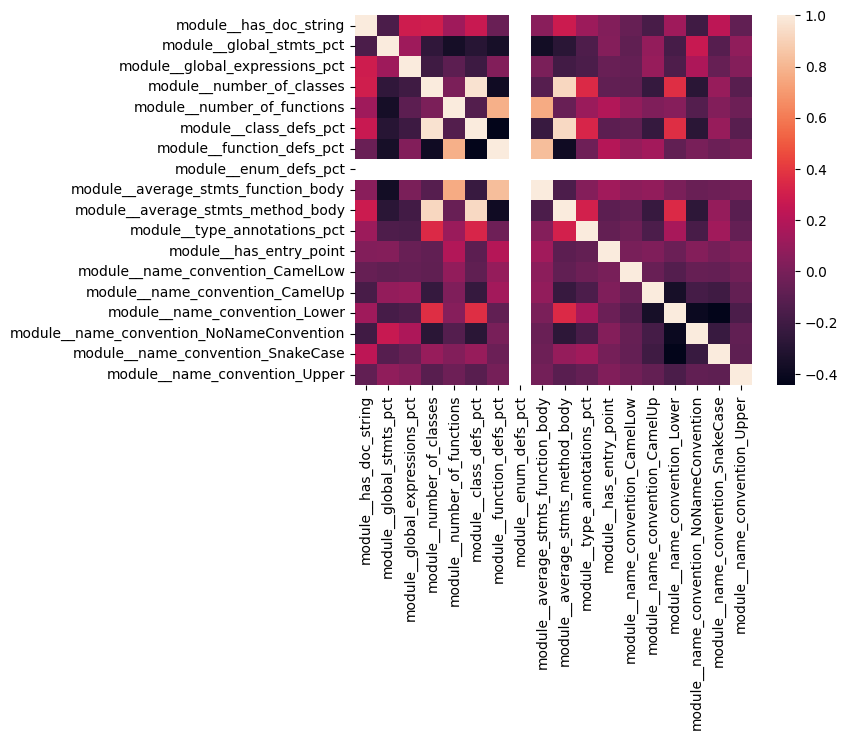

In [9]:
sns.heatmap(X.corr(method='spearman'), annot=False)

## 3 - Detección de valores atípicos (outliers)
## Univariate
## Analisis detallado de variables
Para cada una de las 13 variable (2 booleanas, 6 porcentuales, 4 numericas y una categorica) se hara un analisis detallado

### Variable has_doc_string (1/13)
Esta variable es de tipo booleano y representa si el fichero contiene un comentario como primer nodo.

<Axes: xlabel='module__has_doc_string', ylabel='Count'>

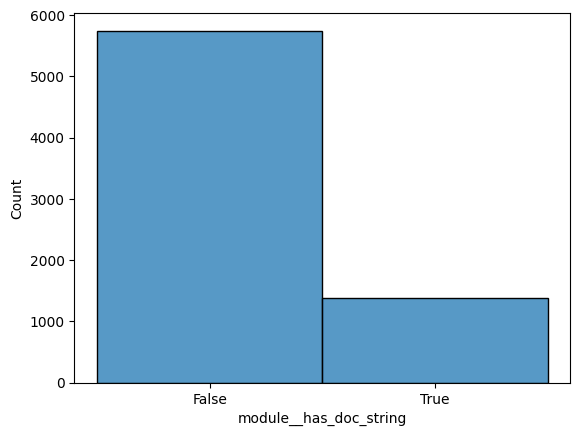

In [10]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_doc_string'], discrete=True)

In [11]:
num_true_values = len(X[X['module__has_doc_string'] == True])
num_false_values = len(X[X['module__has_doc_string'] == False])
std = X['module__has_doc_string'].std()
freq_true = len(X[X['module__has_doc_string'] == True]) / len(X['module__has_doc_string'])
freq_false = len(X[X['module__has_doc_string'] == False]) / len(X['module__has_doc_string'])
print(f'La variable has_doc_string contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_doc_string a False es {freq_false}.')

La variable has_doc_string contiene 1375 valores verdaderos y 5749 valores falsos. Y, la desviación típica es de 0.39468812942504883
La frecuencia con la que programa puede tener la variable has_doc_string a True es 0.19300954519932623.
La frecuencia con la que programa puede tener la variable has_doc_string a False es 0.8069904548006738.


In [12]:
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_doc_string', possible_values)

La variable module__has_doc_string contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_doc_string toma el valor de 0.0 en un 80.7% de los items.
La variable module__has_doc_string toma el valor de 1.0 en un 19.3% de los items.


In [13]:
X[X['module__has_doc_string'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])


,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,1375.0,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.0,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000,1375.000000
mean,1.0,0.191409,0.145751,1.874182,4.598546,0.335712,0.537742,0.0,3.119985,2.255100,0.114368,0.081455,0.001455,0.018909,0.568727,0.018182,0.389818,0.002909
std,0.0,0.202296,0.175404,4.223318,8.679075,0.385138,0.417032,0.0,2.862799,3.024358,0.241668,0.273631,0.038125,0.136254,0.495434,0.133657,0.487886,0.053877
min,1.0,0.000000,0.010870,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.0,0.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.0,0.125000,0.090909,1.000000,2.000000,0.200000,0.666667,0.0,3.192308,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1.0,0.307729,0.166667,2.000000,5.000000,0.555556,1.000000,0.0,5.000000,3.888889,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
max,1.0,0.928571,1.000000,31.000000,80.000000,1.000000,1.000000,0.0,19.000000,19.857143,0.909091,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable has_entry_point (2/13)
Esta variable es de tipo booleano y representa si el fichero contiene el idiom "if __name__ == '__main__'". 

<Axes: xlabel='module__has_entry_point', ylabel='Count'>

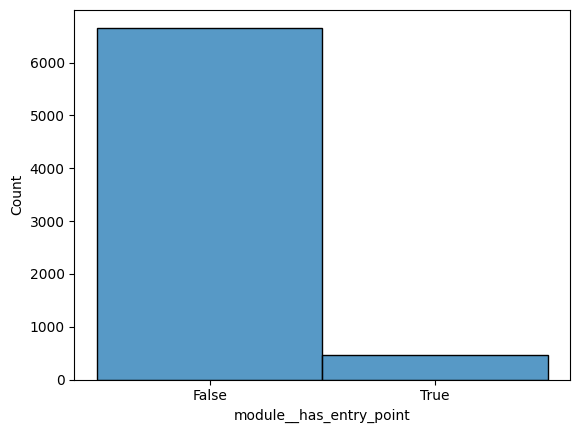

In [14]:
plt.xticks([0, 1], ['False', 'True'])
sns.histplot(X['module__has_entry_point'], discrete=True)

In [15]:
#ANALISIS DE DISTRIBUCIÓN DE DATOS
num_true_values = len(X[X['module__has_entry_point'] == True])
num_false_values = len(X[X['module__has_entry_point'] == False])
std = X['module__has_entry_point'].std()
freq_true = len(X[X['module__has_entry_point'] == True]) / len(X['module__has_entry_point'])
freq_false = len(X[X['module__has_entry_point'] == False]) / len(X['module__has_entry_point'])
print(f'La variable has_entry_point contiene {num_true_values} valores verdaderos y {num_false_values} valores falsos. Y, la desviación típica es de {std}')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a True es {freq_true}.')
print(f'La frecuencia con la que programa puede tener la variable has_entry_point a False es {freq_false}.')

La variable has_entry_point contiene 461 valores verdaderos y 6663 valores falsos. Y, la desviación típica es de 0.24603219330310822
La frecuencia con la que programa puede tener la variable has_entry_point a True es 0.06471083660864682.
La frecuencia con la que programa puede tener la variable has_entry_point a False es 0.9352891633913532.


In [16]:
#PROBABILIDAD DE VALORES
possible_values = [True, False]
print_frequency_anal_for_cat_var(X, 'module__has_entry_point', possible_values)

La variable module__has_entry_point contiene 2 valores distintos.
El umbral de outlier es de 0.1%
La variable module__has_entry_point toma el valor de 0.0 en un 93.53% de los items.
La variable module__has_entry_point toma el valor de 1.0 en un 6.471% de los items.


In [17]:
X[X['module__has_entry_point'] == True].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000,461.0,461.000000,461.000000,461.000000,461.0,461.000000,461.000000,461.000000,461.000000,461.000000,461.000000
mean,0.242950,0.296959,0.065687,2.375271,5.663774,0.051548,0.911576,0.0,4.516544,0.515383,0.017748,1.0,0.017354,0.169197,0.351410,0.227766,0.184382,0.049892
std,0.429331,0.192005,0.102945,10.750134,8.102721,0.158011,0.238225,0.0,4.273596,2.360510,0.096882,0.0,0.130727,0.375333,0.477929,0.419846,0.388216,0.217957
min,0.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.142857,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,2.500000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.250000,0.000000,0.000000,3.000000,0.000000,1.000000,0.0,4.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.400000,0.100000,0.000000,5.000000,0.000000,1.000000,0.0,5.000000,0.000000,0.000000,1.0,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,0.500000,60.000000,37.000000,1.000000,1.000000,0.0,41.000000,22.555555,0.545455,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable number_of_classes (3/13)
Esta variable es de tipo numérica y nos indica el número de clases definidos en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 60. Con una media de 0,97.

<Axes: ylabel='module__number_of_classes'>

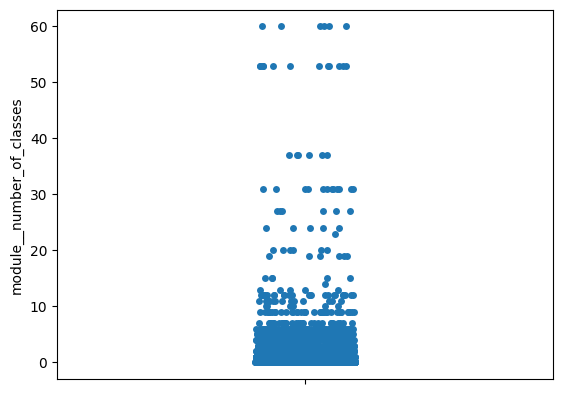

In [18]:
sns.stripplot(X['module__number_of_classes'])

In [19]:
print_outliers_for_df_column(X, 'module__number_of_classes')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.967008235057195
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.05084041272429638,72.7722598500292]
-3.0IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -3.0 (Q1-3*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_classes inferior a -1.5 (Q1-1.5*IQR) para module__number_of_classes. Representando un 0.0% del total de instancias.
+1.5IQR: 597 instancias tienen un valor para module__number_of_classes superior a 2.5 (Q3+1.5*IQR) para module__number_of_classes. Representando un 8.38% del total de instancias.
+3.0IQR: 371 instancias tienen un valor para module__number_of_classes superior a 4.0 (Q3-3*IQR) para module__number_of_classes. Representando un 5.208% del total de instancias.
L: 0 instancias tienen un

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 72.77 (Con un MC de 96 usamos U)

In [20]:
X[X['module__number_of_classes'] > 72.77].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE

No hay nada que destacar en esta variable.

### Variable number_of_functions (4/13)
Esta variable representa el número de funciones en el fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 80. Con una media de 2.97.

<Axes: ylabel='module__number_of_functions'>

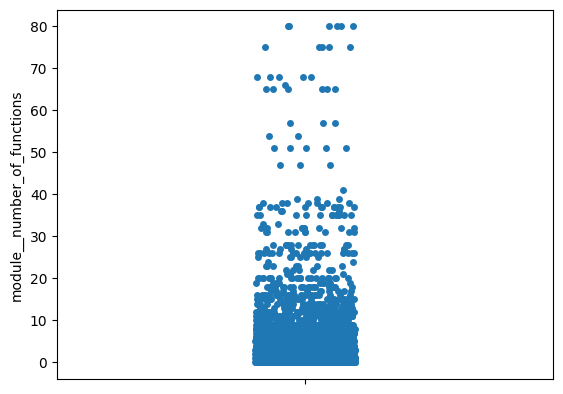

In [21]:
sns.stripplot(X['module__number_of_functions'])

In [22]:
print_outliers_for_df_column(X, 'module__number_of_functions')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.9253368884325027
Rango valores atípicos extremos (Tukey): [-9.0,12.0]
Rango valores atípicos leves (Tukey): [-4.5,7.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.17647047223250062,185.25830707460776]
-3.0IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -9.0 (Q1-3*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__number_of_functions inferior a -4.5 (Q1-1.5*IQR) para module__number_of_functions. Representando un 0.0% del total de instancias.
+1.5IQR: 642 instancias tienen un valor para module__number_of_functions superior a 7.5 (Q3+1.5*IQR) para module__number_of_functions. Representando un 9.012% del total de instancias.
+3.0IQR: 339 instancias tienen un valor para module__number_of_functions superior a 12.0 (Q3-3*IQR) para module__number_of_functions. Representando un 4.759% del total de instancias.
L: 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 185 (Con un MC de 92 usamos U)

In [23]:
X[X['module__number_of_functions'] > 185.2].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE

No hay nada que destacar en esta variable.

### Variable average_stmts_function_body (5/13)
Esta variable representa el número medio de sentencias en el cuerpo de las funciones del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 43. Con una media de 3.055.

<Axes: ylabel='module__average_stmts_function_body'>

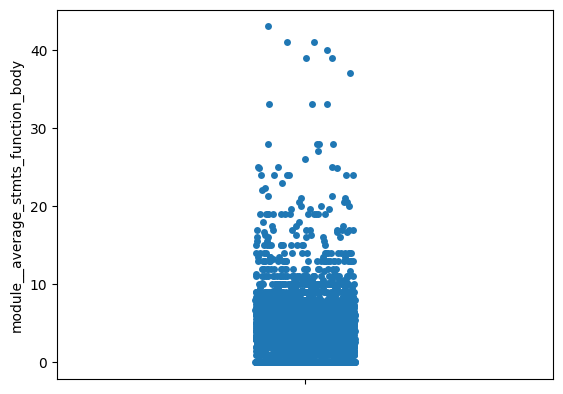

In [24]:
sns.stripplot(X['module__average_stmts_function_body'])

In [25]:
print_outliers_for_df_column(X, 'module__average_stmts_function_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7497278199132728
Rango valores atípicos extremos (Tukey): [-14.571428775787354,19.428571701049805]
Rango valores atípicos leves (Tukey): [-7.285714387893677,12.142857313156128]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.5282783944558255,151.03539437360737]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -14.571428775787354 (Q1-3*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_function_body inferior a -7.285714387893677 (Q1-1.5*IQR) para module__average_stmts_function_body. Representando un 0.0% del total de instancias.
+1.5IQR: 150 instancias tienen un valor para module__average_stmts_function_body superior a 12.142857313156128 (Q3+1.5*IQR) para module__average_stmts_function_body. Representando un 2.106% del total de instancias.
+3.0IQR: 43 instancias tienen un valo

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 19.4 (Con un MC de 74 usamos Tuckey Extremo)

In [26]:
X[X['module__average_stmts_function_body'] > 19.4].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.0,43.000000,43.0,43.0,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000
mean,0.0,0.103058,0.083739,0.511628,2.488372,0.022245,0.977755,0.0,26.625792,0.0,0.0,0.162791,0.093023,0.209302,0.302326,0.255814,0.069767,0.069767
std,0.0,0.167939,0.154862,2.343909,3.354969,0.101909,0.101909,0.0,6.943119,0.0,0.0,0.373544,0.293903,0.411625,0.464701,0.441481,0.257770,0.257770
min,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.521739,0.0,19.636364,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,21.125000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0,24.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.0,0.166667,0.126984,0.000000,2.000000,0.000000,1.000000,0.0,28.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000
max,0.0,0.500000,0.500000,11.000000,12.000000,0.478261,1.000000,0.0,43.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Variable average_stmts_method_body (6/13)
Esta variable representa el número medio de sentencias en el cuerpo de los métodos del fichero. Como vimos en la descripción de la tabla esta varibale adopta valores en el rango 0 - 28. Con una media de 1.1.

<Axes: ylabel='module__average_stmts_method_body'>

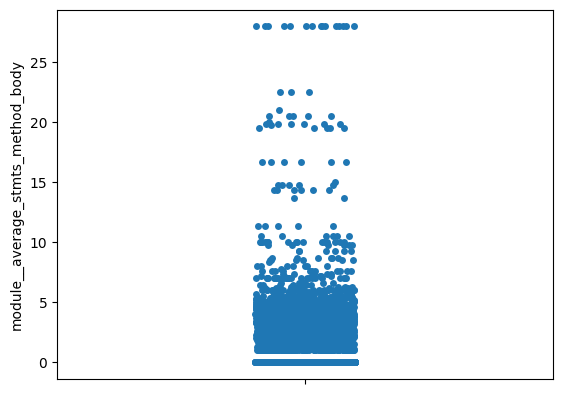

In [27]:
sns.stripplot(X['module__average_stmts_method_body'])

In [28]:
print_outliers_for_df_column(X, 'module__average_stmts_method_body')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.8679952526743878
Rango valores atípicos extremos (Tukey): [-4.071428418159485,5.4285712242126465]
Rango valores atípicos leves (Tukey): [-2.0357142090797424,3.392857015132904]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.0975747367009902,66.90809463187951]
-3.0IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a -4.071428418159485 (Q1-3*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__average_stmts_method_body inferior a -2.0357142090797424 (Q1-1.5*IQR) para module__average_stmts_method_body. Representando un 0.0% del total de instancias.
+1.5IQR: 957 instancias tienen un valor para module__average_stmts_method_body superior a 3.392857015132904 (Q3+1.5*IQR) para module__average_stmts_method_body. Representando un 13.43% del total de instancias.
+3.0IQR: 258 instancias tienen un valor para module_

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 5.4 (Con un MC de 86 usamos Tuckey Extremo)

In [29]:
X[X['module__average_stmts_method_body'] > 5.43].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.000000,258.0,258.000000,258.000000,258.000000,258.000000,258.0,258.000000,258.000000,258.0,258.000000,258.0
mean,0.472868,0.076324,0.038598,1.984496,2.162791,0.687308,0.312692,0.0,1.966341,10.265368,0.180483,0.023256,0.0,0.015504,0.651163,0.0,0.333333,0.0
std,0.500234,0.088141,0.051925,3.568091,3.468122,0.354153,0.354153,0.0,2.383902,6.142341,0.259475,0.151008,0.0,0.123786,0.477529,0.0,0.472321,0.0
min,0.000000,0.000000,0.000000,1.000000,0.000000,0.083333,0.000000,0.0,0.000000,5.500000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
25%,0.000000,0.000000,0.000000,1.000000,0.000000,0.400000,0.000000,0.0,0.000000,6.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.0
50%,0.000000,0.076923,0.000000,1.000000,0.000000,1.000000,0.000000,0.0,0.000000,7.611111,0.000000,0.000000,0.0,0.000000,1.000000,0.0,0.000000,0.0
75%,1.000000,0.100000,0.071429,1.000000,2.000000,1.000000,0.600000,0.0,4.222222,10.500000,0.400000,0.000000,0.0,0.000000,1.000000,0.0,1.000000,0.0
max,1.000000,0.500000,0.200000,24.000000,11.000000,1.000000,0.916667,0.0,8.000000,28.000000,0.833333,1.000000,0.0,1.000000,1.000000,0.0,1.000000,0.0


### Variable name_convention (7/13)
Esta variable es de tipo categórica y representa la name_convention del nombre del fichero.

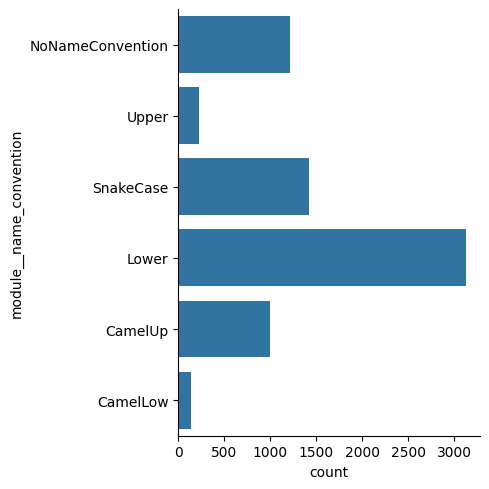

In [30]:
sns.catplot(full_table['module__name_convention'], kind="count")

In [31]:
print_frequency_anal_for_cat_var(full_table, 'module__name_convention')

La variable module__name_convention contiene 6 valores distintos.
El umbral de outlier es de 0.03333333333333333%
La variable module__name_convention toma el valor de Lower en un 43.88% de los items.
La variable module__name_convention toma el valor de SnakeCase en un 20.0% de los items.
La variable module__name_convention toma el valor de NoNameConvention en un 17.07% de los items.
La variable module__name_convention toma el valor de CamelUp en un 14.05% de los items.
La variable module__name_convention toma el valor de Upper en un 3.116% de los items.
La variable module__name_convention toma el valor de CamelLow en un 1.881% de los items.


In [32]:
print_values_usage_for_cat_var(full_table, 'module__name_convention', NAMING_CONVENTION_VALUES)

La variable module__name_convention puede tomar 7 valores distintos
	6 (85.71%) valores utilizados
	1 (14.29%) valores NO utilizados
		La variable module__name_convention nunca toma valor Discard.


### Variable global_stmts_pct (8/13)
Esta variable representa la proporción de los nodos en el global scope que son sentencias. Toma los valores de 0.0 - 1.0. La media es 0.32.

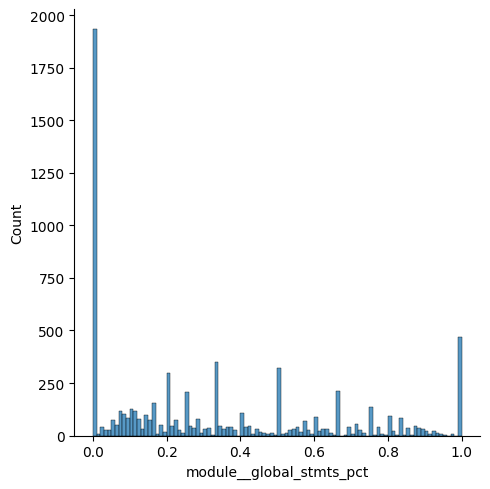

In [33]:
sns.displot(X['module__global_stmts_pct'], bins=[i / 100 for i in range(0, 101)])

In [34]:
print_outliers_for_df_column(X, 'module__global_stmts_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.3781300857466282
Rango valores atípicos extremos (Tukey): [-1.6666667461395264,2.222222328186035]
Rango valores atípicos leves (Tukey): [-0.8333333730697632,1.388888955116272]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.2218448957192291,4.3373508438749555]
-3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -1.6666667461395264 (Q1-3*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct inferior a -0.8333333730697632 (Q1-1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__global_stmts_pct superior a 1.388888955116272 (Q3+1.5*IQR) para module__global_stmts_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__global_stmts_pct superior a 2.222222328186035 (Q3-3*IQR) 

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 2.22 (Con un MC de 37 usamos Tuckey Extremo)

In [35]:
X[X['module__global_stmts_pct'] > 2.22].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay nada que destacar en esta variable.

### Variable global_expressions_pct (9/13)
Esta variable representa la proporción de los nodos en el global scope son expresiones. Este campo toma valores del 0.0 - 1.0. Su media es 0.11.

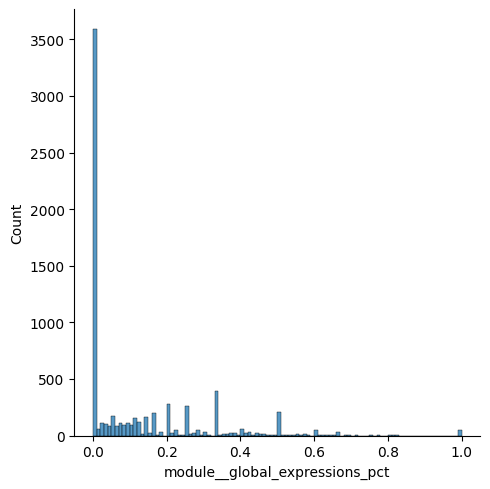

In [36]:
sns.displot(X['module__global_expressions_pct'], bins=[i / 100 for i in range(0, 101)])

In [37]:
print_outliers_for_df_column(X, 'module__global_expressions_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.513825716753711
Rango valores atípicos extremos (Tukey): [-0.6000000089406967,0.800000011920929]
Rango valores atípicos leves (Tukey): [-0.30000000447034836,0.5000000074505806]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.049669570445769126,2.5427608372126063]
-3.0IQR: 0 instancias tienen un valor para module__global_expressions_pct inferior a -0.6000000089406967 (Q1-3*IQR) para module__global_expressions_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__global_expressions_pct inferior a -0.30000000447034836 (Q1-1.5*IQR) para module__global_expressions_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 211 instancias tienen un valor para module__global_expressions_pct superior a 0.5000000074505806 (Q3+1.5*IQR) para module__global_expressions_pct. Representando un 2.962% del total de instancias.
+3.0IQR: 49 instancias tienen un valor para module__global_expr

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0.80 (Con un MC de 51 usamos Tuckey Extremo)

In [38]:
X[X['module__global_expressions_pct'] > 0.80].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,49.000000,49.000000,49.000000,49.0,49.000000,49.0,49.000000,49.0,49.000000,49.0,49.0,49.0,49.000000,49.000000,49.000000,49.000000,49.000000,49.0
mean,0.734694,0.007967,0.985267,0.0,0.020408,0.0,0.020408,0.0,0.142857,0.0,0.0,0.0,0.040816,0.020408,0.183673,0.020408,0.734694,0.0
std,0.446071,0.027205,0.049933,0.0,0.142857,0.0,0.142857,0.0,1.000000,0.0,0.0,0.0,0.199915,0.142857,0.391230,0.142857,0.446071,0.0
min,0.000000,0.000000,0.818182,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,1.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
75%,1.000000,0.000000,1.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.0
max,1.000000,0.117647,1.000000,0.0,1.000000,0.0,1.000000,0.0,7.000000,0.0,0.0,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### IMPORTANTE

 El 50% de los modulos no tiene expresiones en el global scope.


### Variable class_defs_pct (10/13)
Esta variable representa la proporción de definiciones que son definiciones de clases. Esta variable toma valores de 0.0 - 1.0. Su media es 0.20. 

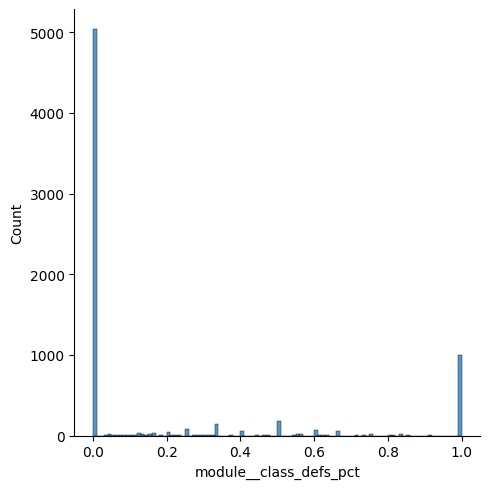

In [39]:
sns.displot(X['module__class_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [40]:
print_outliers_for_df_column(X, 'module__class_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5486870408058167
Rango valores atípicos extremos (Tukey): [-0.75,1.0]
Rango valores atípicos leves (Tukey): [-0.375,0.625]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.05495536900368594,3.61665244263925]
-3.0IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -0.75 (Q1-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__class_defs_pct inferior a -0.375 (Q1-1.5*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 1153 instancias tienen un valor para module__class_defs_pct superior a 0.625 (Q3+1.5*IQR) para module__class_defs_pct. Representando un 16.18% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__class_defs_pct superior a 1.0 (Q3-3*IQR) para module__class_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para mod

### IMPORTANTE
Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [41]:
X[(X['module__class_defs_pct'] > 0.0) & (X['module__class_defs_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.0,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.0
mean,0.479301,0.186821,0.036209,4.252990,7.425023,0.398485,0.601515,0.0,4.164744,3.718316,0.167355,0.057958,0.001840,0.004600,0.705612,0.002760,0.285189,0.0
std,0.499801,0.161478,0.044802,7.856296,11.242744,0.208778,0.208778,0.0,2.074783,3.729260,0.248248,0.233771,0.042875,0.067697,0.455977,0.052486,0.451712,0.0
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.034483,0.083333,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.072289,0.000000,1.000000,2.000000,0.250000,0.444444,0.0,3.000000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.148148,0.024390,2.000000,4.000000,0.375000,0.625000,0.0,4.000000,3.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
75%,1.000000,0.272727,0.058824,4.000000,7.000000,0.555556,0.750000,0.0,5.000000,4.437500,0.403614,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0
max,1.000000,0.836364,0.292683,60.000000,75.000000,0.916667,0.965517,0.0,24.833334,28.000000,0.894737,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### IMPORTANTE

 El 70% de los modulos no tiene clases definidas.

### Variable function_defs_pct (11/13)
Esta variable representa la proporción de deficiones que son definiciones de funciones. Esta variable toma valores de 0.0 - 1.0. Su media es 0.54

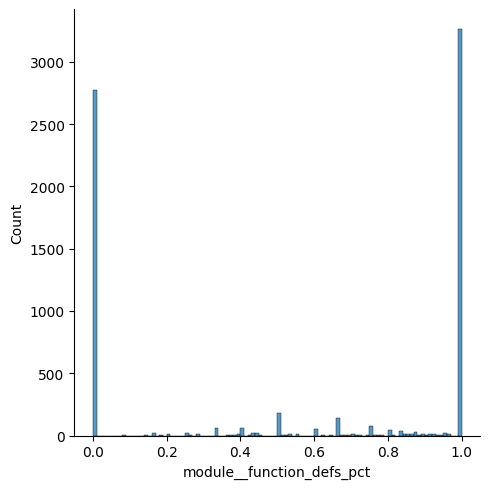

In [42]:
sns.displot(X['module__function_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [43]:
print_outliers_for_df_column(X, 'module__function_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.1565211401618383
Rango valores atípicos extremos (Tukey): [-3.0,4.0]
Rango valores atípicos leves (Tukey): [-1.5,2.5]
Rango valores atípicos extremos (Fixed BoxPlot): [-0.8673099383031981,3.805409923985628]
-3.0IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -3.0 (Q1-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__function_defs_pct inferior a -1.5 (Q1-1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 2.5 (Q3+1.5*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__function_defs_pct superior a 4.0 (Q3-3*IQR) para module__function_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor

### IMPORTANTE
Estos valores siguen un distribucion en forma de U (distribucion de Laplace). Con lo que los posibles valores outliers estan en el medio, no en los extremos. No se puede aplicar el metodo de tukey. En este momento, solo vamos a mostrar los valores que hay en el medio.

In [44]:
X[(X['module__function_defs_pct'] > 0.0) & (X['module__function_defs_pct'] < 1.0)].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.0,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.000000,1087.0
mean,0.479301,0.186821,0.036209,4.252990,7.425023,0.398485,0.601515,0.0,4.164744,3.718316,0.167355,0.057958,0.001840,0.004600,0.705612,0.002760,0.285189,0.0
std,0.499801,0.161478,0.044802,7.856296,11.242744,0.208778,0.208778,0.0,2.074783,3.729260,0.248248,0.233771,0.042875,0.067697,0.455977,0.052486,0.451712,0.0
min,0.000000,0.000000,0.000000,1.000000,1.000000,0.034483,0.083333,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,0.000000,0.072289,0.000000,1.000000,2.000000,0.250000,0.444444,0.0,3.000000,1.960000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,0.000000,0.148148,0.024390,2.000000,4.000000,0.375000,0.625000,0.0,4.000000,3.250000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0
75%,1.000000,0.272727,0.058824,4.000000,7.000000,0.555556,0.750000,0.0,5.000000,4.437500,0.403614,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.0
max,1.000000,0.836364,0.292683,60.000000,75.000000,0.916667,0.965517,0.0,24.833334,28.000000,0.894737,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### IMPORTANTE

 Casi el 50% de los modulos solo tiene definiciones de funciones

### Variable enum_defs_pct (12/13)
Esta variable representa la proporción de las definiciones que son clases con la notación enum. Esta variable toma valores de 0.0 - 0.0. Su media es 0.0.

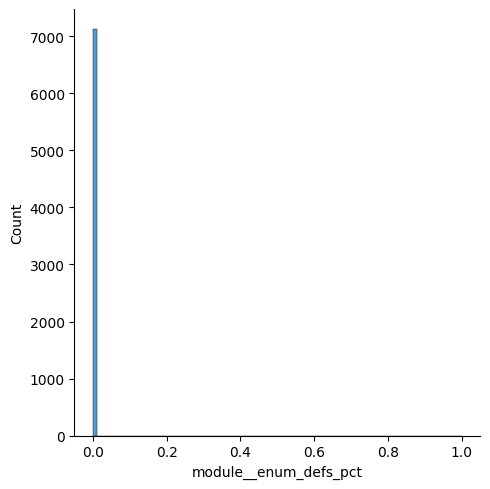

In [45]:
sns.displot(X['module__enum_defs_pct'], bins=[i / 100 for i in range(0, 101)])

In [46]:
print_outliers_for_df_column(X, 'module__enum_defs_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.5
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-3*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 (Q1-1.5*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 0 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3+1.5*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
+3.0IQR: 0 instancias tienen un valor para module__enum_defs_pct superior a 0.0 (Q3-3*IQR) para module__enum_defs_pct. Representando un 0.0% del total de instancias.
L: 0 instancias tienen un valor para module__enum_defs_pct inferior a 0.0 para module__enum_defs_pct. Representa

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [47]:
X[X['module__enum_defs_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### IMPORTANTE
No hay ningun modulo con definciones de enums.

### Variable type_annotations_pct (13/13)
Esta variable representa la proporción de los parámetros y returns de funciones y métodos que tienen una anotación de tipo. Toma valores entre 0.0 - 0.90. Su media es 0.06.

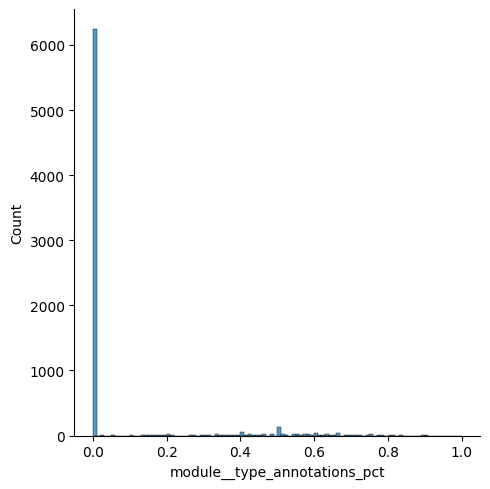

In [48]:
sns.displot(X['module__type_annotations_pct'], bins=[i / 100 for i in range(0, 101)])

In [49]:
print_outliers_for_df_column(X, 'module__type_annotations_pct')

El coeficiente MC (Medcouple Coefficient) de balanceo es: 0.7894976401358711
Rango valores atípicos extremos (Tukey): [0.0,0.0]
Rango valores atípicos leves (Tukey): [0.0,0.0]
Rango valores atípicos extremos (Fixed BoxPlot): [0.0,0.0]
-3.0IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a 0.0 (Q1-3*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
-1.5IQR: 0 instancias tienen un valor para module__type_annotations_pct inferior a 0.0 (Q1-1.5*IQR) para module__type_annotations_pct. Representando un 0.0% del total de instancias.
+1.5IQR: 885 instancias tienen un valor para module__type_annotations_pct superior a 0.0 (Q3+1.5*IQR) para module__type_annotations_pct. Representando un 12.42% del total de instancias.
+3.0IQR: 885 instancias tienen un valor para module__type_annotations_pct superior a 0.0 (Q3-3*IQR) para module__type_annotations_pct. Representando un 12.42% del total de instancias.
L: 0 instancias tienen un valor p

Describimos los valores de las variables de la tabla, cuando el valor de la variable es mayor que 0 (Todos los umbrales son 0)

In [50]:
X[X['module__type_annotations_pct'] > 0.0].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int'])

,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__name_convention_CamelLow,module__name_convention_CamelUp,module__name_convention_Lower,module__name_convention_NoNameConvention,module__name_convention_SnakeCase,module__name_convention_Upper
count,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.000000,885.0,885.000000,885.000000,885.000000,885.000000,885.000000,885.0,885.000000,885.0,885.000000,885.0
mean,0.303955,0.157334,0.030448,1.980791,3.969491,0.463983,0.536017,0.0,2.958080,2.824511,0.496445,0.016949,0.003390,0.0,0.653107,0.0,0.343503,0.0
std,0.460223,0.148785,0.055619,3.028274,6.485991,0.409216,0.409216,0.0,2.348784,4.415740,0.172141,0.129154,0.058156,0.0,0.476250,0.0,0.475146,0.0
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.007246,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
25%,0.000000,0.062500,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.400000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0
50%,0.000000,0.103448,0.000000,1.000000,2.000000,0.333333,0.666667,0.0,3.333333,1.773585,0.500000,0.000000,0.000000,0.0,1.000000,0.0,0.000000,0.0
75%,1.000000,0.200000,0.047619,2.000000,4.000000,1.000000,1.000000,0.0,4.600000,3.750000,0.600000,0.000000,0.000000,0.0,1.000000,0.0,1.000000,0.0
max,1.000000,0.697674,0.333333,27.000000,54.000000,1.000000,1.000000,0.0,9.500000,28.000000,0.909091,1.000000,1.000000,0.0,1.000000,0.0,1.000000,0.0


### IMPORTANTE
El 87% de los modulos no tiene anotaciones de tipo.

## Multivariate

Isolation forest algorithm

In [51]:
from sklearn.ensemble import  IsolationForest

CONTAMINATION_FACTOR = 0.0012
isof_model = IsolationForest(contamination=CONTAMINATION_FACTOR, random_state=0)
isof_prediction = isof_model.fit_predict(X.values)
mask = isof_prediction == -1
full_table.loc[X.index[mask]]

,module__name_convention,module__has_doc_string,module__global_stmts_pct,module__global_expressions_pct,module__number_of_classes,module__number_of_functions,module__class_defs_pct,module__function_defs_pct,module__enum_defs_pct,module__average_stmts_function_body,module__average_stmts_method_body,module__type_annotations_pct,module__has_entry_point,module__expertise_level
426,Lower,False,0.368687,0.060606,60,37,0.618557,0.381443,0.0,4.594595,3.464684,0.0,True,BEGINNER
4327,Lower,False,0.368687,0.060606,60,37,0.618557,0.381443,0.0,4.594595,3.464684,0.0,True,BEGINNER
4899,Lower,False,0.368687,0.060606,60,37,0.618557,0.381443,0.0,4.594595,3.464684,0.0,True,BEGINNER
5617,Lower,False,0.368687,0.060606,60,37,0.618557,0.381443,0.0,4.594595,3.464684,0.0,True,BEGINNER
6322,Lower,False,0.368687,0.060606,60,37,0.618557,0.381443,0.0,4.594595,3.464684,0.0,True,BEGINNER
6956,Lower,False,0.368687,0.060606,60,37,0.618557,0.381443,0.0,4.594595,3.464684,0.0,True,BEGINNER


### IMPORTANTE
Analizar los 6 resultados obtenidos.

In [52]:
# Outliers
np.transpose(X[mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
module__has_doc_string,6.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
module__global_stmts_pct,6.0,0.368687,0.0,0.368687,0.368687,0.368687,0.368687,0.368687
module__global_expressions_pct,6.0,0.060606,0.0,0.060606,0.060606,0.060606,0.060606,0.060606
module__number_of_classes,6.0,60.000000,0.0,60.000000,60.000000,60.000000,60.000000,60.000000
module__number_of_functions,6.0,37.000000,0.0,37.000000,37.000000,37.000000,37.000000,37.000000
module__class_defs_pct,6.0,0.618557,0.0,0.618557,0.618557,0.618557,0.618557,0.618557
module__function_defs_pct,6.0,0.381443,0.0,0.381443,0.381443,0.381443,0.381443,0.381443
module__enum_defs_pct,6.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
module__average_stmts_function_body,6.0,4.594594,0.0,4.594594,4.594594,4.594594,4.594594,4.594594
module__average_stmts_method_body,6.0,3.464684,0.0,3.464684,3.464684,3.464684,3.464684,3.464684


In [53]:
# Non-Outliers
np.transpose(X[~mask].describe(percentiles=[.25, .50, .75], include = ['object', 'float', 'bool', 'int']))

,count,mean,std,min,25%,50%,75%,max
module__has_doc_string,7118.0,0.193172,0.394815,0.0,0.0,0.000000,0.000000,1.000000
module__global_stmts_pct,7118.0,0.322705,0.321658,0.0,0.0,0.222222,0.555556,1.000000
module__global_expressions_pct,7118.0,0.115551,0.173330,0.0,0.0,0.000000,0.200000,1.000000
module__number_of_classes,7118.0,0.929756,3.415140,0.0,0.0,0.000000,1.000000,53.000000
module__number_of_functions,7118.0,2.944366,6.581745,0.0,0.0,1.000000,3.000000,80.000000
module__class_defs_pct,7118.0,0.200961,0.361717,0.0,0.0,0.000000,0.250000,1.000000
module__function_defs_pct,7118.0,0.549671,0.466700,0.0,0.0,0.750000,1.000000,1.000000
module__enum_defs_pct,7118.0,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000
module__average_stmts_function_body,7118.0,3.054122,3.676521,0.0,0.0,2.787037,4.857143,43.000000
module__average_stmts_method_body,7118.0,1.098424,2.557258,0.0,0.0,0.000000,1.353795,28.000000
